In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import plotly.graph_objects as go
import pycountry

In [105]:
#load dataset
nflx = pd.read_csv('titles.csv')

In [106]:
#head dataset
nflx.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [107]:
#info dataset
nflx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [108]:
#some statistics of dataset
nflx.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [109]:
#Check the missing value
nflx.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

# Dealing with missing value

Title

In [110]:
nflx2 = nflx
nflx2[nflx2['title'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1704,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN


In [111]:
#Since only few information avaible and the missing data only 1, data with missing title will be removed
nflx2.dropna(subset=['title'], inplace=True)

Description

In [112]:
nflx2[nflx2['description'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1111,ts271005,幸福料理,SHOW,NaN,2014,TV-14,44,[],[],1.0,NaN,NaN,NaN,0.600,NaN
1114,tm681614,Grandmother's Farm,MOVIE,NaN,2013,NaN,71,"['comedy', 'horror']",[],NaN,tt10033686,2.9,78.0,NaN,NaN
2105,ts82770,Camarón Revolution,SHOW,NaN,2018,TV-14,52,"['documentation', 'reality']",['ES'],1.0,NaN,NaN,NaN,1.290,7.0
2189,ts82375,Beyblade Burst Turbo,SHOW,NaN,2018,TV-Y7,22,"['scifi', 'action']",['JP'],1.0,NaN,NaN,NaN,0.600,0.5
2485,ts268283,RIDE ON TIME,SHOW,NaN,2018,TV-PG,22,[],['JP'],3.0,NaN,NaN,NaN,1.328,NaN
2754,ts106612,Chicken Soup for the Soul's Being Dad,SHOW,NaN,2018,TV-PG,40,['reality'],[],1.0,tt8908110,NaN,NaN,NaN,NaN
2798,tm407349,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,['documentation'],['BR'],NaN,tt16114198,6.6,5.0,1.400,5.8
3700,ts312044,Beyblade Burst Surge,SHOW,NaN,2020,TV-Y,23,['animation'],['JP'],1.0,tt18554728,8.3,30.0,7.501,9.7
4110,ts223062,ปริศนาล่าข้ามเวลา,SHOW,NaN,2019,TV-14,60,[],['TH'],1.0,NaN,NaN,NaN,1.473,7.0
4274,tm1172010,The Lockdown Plan,MOVIE,NaN,2020,NaN,49,[],[],NaN,tt13079112,6.5,NaN,NaN,NaN


In [114]:
#Since description is hard to imputed and only few data with missing description, the data with missing description will be removed
nflx2.dropna(subset=['description'], inplace=True)

Age certification

In [115]:
nflx2[nflx2['age_certification'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.6
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['action', 'drama', 'war']","['GB', 'US']",NaN,tt0054953,7.5,50748.0,13.844,7.3
13,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"['romance', 'comedy']",['US'],NaN,tt0047673,7.5,42488.0,8.915,7.2
14,tm135083,Cairo Station,MOVIE,"Qinawi, a physically challenged peddler who ma...",1958,NaN,77,"['drama', 'crime', 'comedy']",['EG'],NaN,tt0051390,7.5,4471.0,5.546,7.3
17,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NaN,133,['drama'],['EG'],NaN,tt0077751,7.2,1727.0,1.370,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,NaN,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3


In [116]:
#Since many data with no age certification, the missing data will be replaced with "No age certification"
nflx2['age_certification'].fillna('No age certification', inplace=True)

Seasons

In [117]:
#Check the data with missing seasons
nflx2[nflx2['seasons'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,No age certification,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,No age certification,35,[],['US'],NaN,NaN,NaN,NaN,NaN,NaN
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,No age certification,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,No age certification,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,No age certification,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300


All of data that with missing seasons seems to have type 'movie', so I will confirm it


In [118]:
len(nflx2[(nflx2['type']=='MOVIE') & (nflx2['seasons'].isnull())])

3735

All data with movie type has no seasons. It's understandable since movie doesn't has seasons.

In [119]:
#replace missing seasons with 0 (No seasons)
nflx2['seasons'].fillna(0, inplace=True)

Imdb_id variable

In [120]:
nflx[nflx2['imdb_id'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
75,tm132164,Bill Hicks: Sane Man,MOVIE,Sane Man was filmed before Bill recorded ‘Dang...,1989,R,80,['comedy'],['US'],0.0,NaN,NaN,NaN,3.377,7.5
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991,TV-G,18,"['documentation', 'family', 'reality']",['JP'],12.0,NaN,NaN,NaN,7.730,7.8
177,ts224786,Escalona,SHOW,"The improbable real life of Rafael Escalona, w...",1991,TV-MA,44,['drama'],['CO'],1.0,NaN,NaN,NaN,7.352,7.6
180,tm8687,Sam Kinison: Family Entertainment Hour,MOVIE,Get ready to scream with laughter! Sam Kinison...,1991,No age certification,49,['comedy'],['US'],0.0,NaN,NaN,NaN,1.840,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5802,ts302434,Plastic Cup Boyz: Laughing My Mask Off!,SHOW,Comedy collective The Plastic Cup Boyz pour ou...,2021,No age certification,33,[],[],1.0,NaN,NaN,NaN,0.683,NaN
5833,ts307884,HQ Barbers,SHOW,When a family run barber shop in the heart of ...,2021,TV-14,24,['comedy'],['NG'],1.0,NaN,NaN,NaN,0.840,NaN
5840,tm1216735,Sun of the Soil,MOVIE,"In 14th-century Mali, an ambitious young royal...",2022,No age certification,26,[],[],0.0,NaN,NaN,NaN,1.179,7.0
5844,tm1074617,Bling Empire - The Afterparty,MOVIE,"The stars of ""Bling Empire"" discuss the show's...",2021,No age certification,35,[],['US'],0.0,NaN,NaN,NaN,NaN,NaN


In [121]:
#Since only few data with missing imdb id, data with missing imdb id will be removed
nflx2.dropna(subset=['imdb_id'], inplace=True)

Imdb_score, Imdb votes

Data with missing value in both columns will be replaced by 0

Data with missing in only one column will be removed

In [122]:
nflx2[['imdb_score', 'imdb_votes']] =  nflx2[['imdb_score', 'imdb_votes']].fillna(0)
nflx2.dropna(subset='imdb_score', inplace=True)
nflx2.dropna(subset='imdb_votes', inplace=True)

Tmdb_popularity

In [123]:
nflx2[nflx2['tmdb_popularity'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
411,ts74931,Kung Fu Panda Awesome Secrets,SHOW,"In this pair of adventures, Po tells the story...",2008,TV-PG,32,"['action', 'animation', 'comedy', 'family']",['US'],1.0,tt6963796,7.1,59.0,NaN,NaN
514,ts137477,Behind Enemy Lines,SHOW,Documentary about the creation of the Commando...,2001,TV-14,49,['drama'],['US'],1.0,tt5170230,7.2,43.0,NaN,NaN
556,ts178360,El cartel 2 - La guerra total,SHOW,Now Pepe Cadena finishes telling the story in ...,2010,TV-MA,44,"['horror', 'thriller', 'war', 'action', 'crime']",['CO'],1.0,tt1667724,6.7,231.0,NaN,NaN
564,ts160526,Khawatir,SHOW,A TV show devoted to help young people to be m...,2005,TV-14,19,['reality'],[],11.0,tt3062514,9.5,3115.0,NaN,NaN
574,tm712151,Laugh Out Loud,MOVIE,The biggest stand-up comedy event ever in Sout...,2003,No age certification,60,['comedy'],['ZA'],0.0,tt0401575,7.0,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5725,ts305254,The Ingenuity of the Househusband,SHOW,"Web series of shorts starring Kenjiro Tsuda, t...",2021,No age certification,5,['comedy'],[],1.0,tt15170710,6.7,423.0,NaN,NaN
5807,tm1011248,30 March,MOVIE,"Ali, the fugitive from a murder he does not ev...",2021,No age certification,99,"['crime', 'drama', 'thriller']",[],0.0,tt13694540,4.0,153.0,NaN,NaN
5810,tm1225897,Social Man,MOVIE,Two competitive social media Influencers go he...,2021,No age certification,96,"['comedy', 'drama']",[],0.0,tt20198164,0.0,0.0,NaN,NaN
5823,tm1099342,Devdas Brothers,MOVIE,"After their first heartbreaks, four jilted you...",2021,No age certification,99,['drama'],[],0.0,tt12478372,3.3,51.0,NaN,NaN


In [124]:
#Only few data with missing tmdb_popularity, so it will be removed 
nflx2.dropna(subset='tmdb_popularity', inplace=True)

Tmdb_score

In [125]:
nflx2[nflx2['tmdb_score'].isnull()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
56,tm721687,Vaashi,MOVIE,"Ebin Mathew, a budding lawyer ambitiously join...",1983,No age certification,123,"['drama', 'thriller']",['IN'],0.0,tt13913068,6.7,388.0,3.790,NaN
79,tm342996,Duniya,MOVIE,Mohan Kumar's diligence and honesty lands him ...,1984,No age certification,170,"['action', 'drama']",['IN'],0.0,tt0301231,6.3,245.0,1.394,NaN
83,ts63001,High Risk,SHOW,High Risk is a program aired by the CBS televi...,1988,TV-PG,50,['comedy'],['US'],1.0,tt5944220,3.8,6.0,1.400,NaN
84,tm311264,Muqaddar Ka Faisla,MOVIE,"Muqaddar ka Faisla, is the story of Pandit Kri...",1987,No age certification,172,"['action', 'comedy', 'drama', 'family']",['IN'],0.0,tt0239682,4.8,69.0,2.236,NaN
85,tm411457,Pyar Ke Do Pal,MOVIE,"In order to assist her close friend, Rajni Tha...",1986,No age certification,125,"['drama', 'action']",['IN'],0.0,tt0358053,6.1,66.0,1.756,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],1.0,tt15978704,8.2,5.0,2.334,NaN
5837,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,No age certification,108,['comedy'],['PH'],0.0,tt14412240,5.8,27.0,2.170,NaN
5839,tm1165179,Kongsi Raya,MOVIE,Jack - a Chinese chef-manager who is in-line t...,2022,No age certification,102,['comedy'],['MY'],0.0,tt16806990,7.0,66.0,2.112,NaN
5841,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,No age certification,115,"['comedy', 'romance']",['PH'],0.0,tt13399802,7.1,50.0,1.383,NaN


In [126]:
#Only few data with missing tmdb_score, so it will be removed 
nflx2.dropna(subset='tmdb_score', inplace=True)

In [127]:
#Check data again
nflx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5189 entries, 1 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5189 non-null   object 
 1   title                 5189 non-null   object 
 2   type                  5189 non-null   object 
 3   description           5189 non-null   object 
 4   release_year          5189 non-null   int64  
 5   age_certification     5189 non-null   object 
 6   runtime               5189 non-null   int64  
 7   genres                5189 non-null   object 
 8   production_countries  5189 non-null   object 
 9   seasons               5189 non-null   float64
 10  imdb_id               5189 non-null   object 
 11  imdb_score            5189 non-null   float64
 12  imdb_votes            5189 non-null   float64
 13  tmdb_popularity       5189 non-null   float64
 14  tmdb_score            5189 non-null   float64
dtypes: float64(5), int64(

All missing values has been removed. 

In [128]:
#reset the index
nflx2.reset_index(inplace=True)

In [129]:
nflx2.head()

,index,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,40.965,8.179
1,2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,10.010,7.300
2,3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,15.461,7.811
3,4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,No age certification,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,20.398,7.600
4,5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306


In [130]:
nflx2.drop(nflx.columns[0], axis=1,inplace=True)

In [131]:
nflx2.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,40.965,8.179
1,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,10.010,7.300
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,15.461,7.811
3,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,No age certification,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,20.398,7.600
4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306


In [132]:
#save new file to a csv file
nflx2.to_csv('nflx2.csv')

#alternative
#pd.write_csv('file directory path')

# Exploratory Data Analysis

Title 

In [133]:
nflx2['title'].value_counts()

The Gift                              3
Taxi Driver                           2
Connected                             2
Johnny Test                           2
Fearless                              2
                                     ..
Friends from College                  1
An Evening with Beverly Luff Linn     1
RBG                                   1
Ravenous                              1
Mighty Little Bheem: Kite Festival    1
Name: title, Length: 5148, dtype: int64

There are some title appear more than once

Type

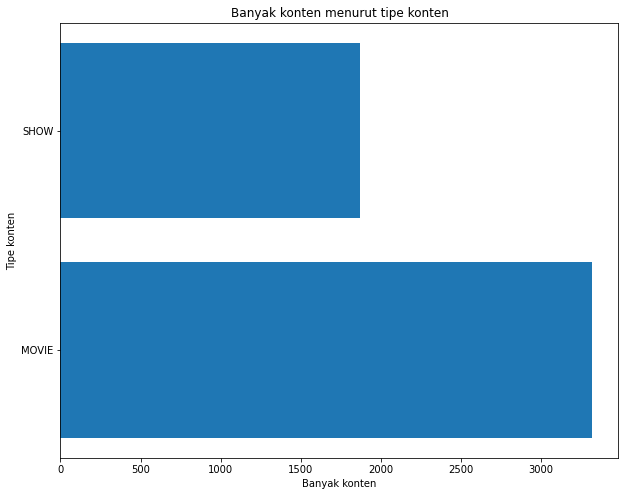

In [134]:
fig = plt.figure(figsize=(10,8))
plt.barh(y=nflx2['type'].unique(), width=nflx2['type'].value_counts())
plt.xlabel('Banyak konten')
plt.ylabel('Tipe konten')
plt.title('Banyak konten menurut tipe konten')
plt.show(fig)

The content dominated by movie

Release year

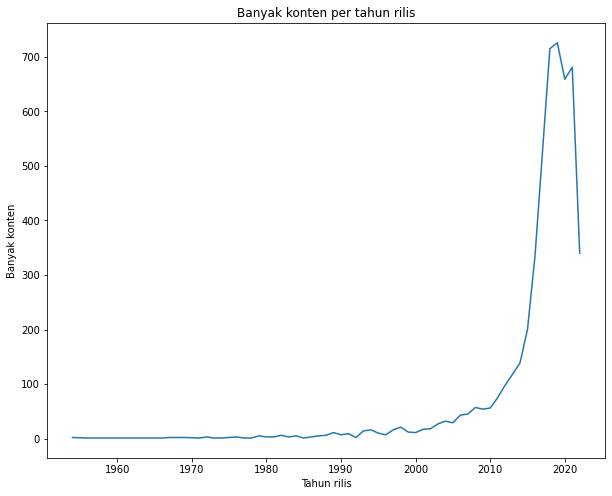

In [135]:
fig = plt.figure(figsize=(10,8))
relye_df = pd.DataFrame(nflx2['release_year'].value_counts())
relye_df.rename(columns={'release_year':'banyak_konten'}, inplace=True)
sns.lineplot(x = relye_df.index, y='banyak_konten', data=relye_df)
plt.xlabel('Tahun rilis')
plt.ylabel('Banyak konten')
plt.title('Banyak konten per tahun rilis')
plt.show(fig)

Age certification

In [136]:
fig = go.Figure(
    go.Pie(
    labels = nflx2['age_certification'].unique(),
    values = nflx2['age_certification'].value_counts(),
    hoverinfo = "label",
    textinfo = "percent"
))
fig.update_layout(
    title={'text': "Persentase konten berdasarkan sertifikasi usia",
            'y':0.9,
            'x':0.5})
fig.show()

Runtime

c:\Users\Julio\anaconda3\envs\capstone_tetris\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



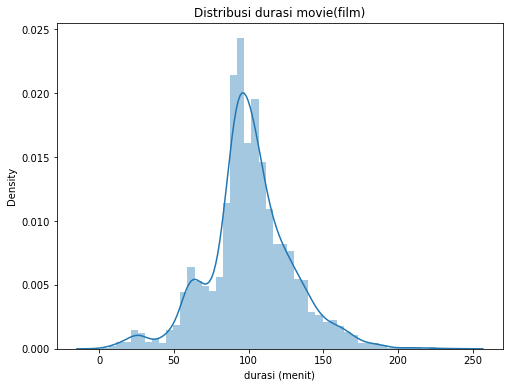

In [137]:
#movie
fig1 = plt.figure(figsize=(8,6))
sns.distplot(nflx2[nflx2['type']=='MOVIE']['runtime'])
plt.title('Distribusi durasi movie(film)')
plt.xlabel('durasi (menit)')
plt.show(fig1)

c:\Users\Julio\anaconda3\envs\capstone_tetris\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



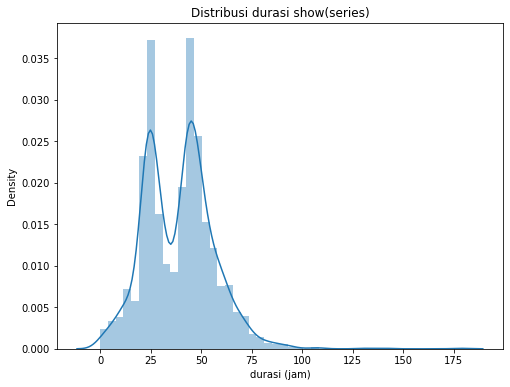

In [32]:
#series
fig2 = plt.figure(figsize=(8,6))
sns.distplot(nflx2[nflx2['type']=='SHOW']['runtime'])
plt.title('Distribusi durasi show(series)')
plt.xlabel('durasi (jam)')
plt.show(fig2)


Genre

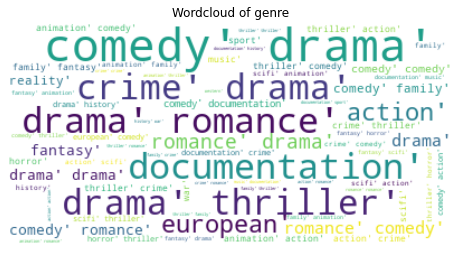

In [33]:
#Wordcloud of genres
genre = " ".join(i for i in nflx2.genres)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(genre)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud of genre")
plt.axis("off")
plt.show()

In [34]:
genre_count= []
for i in nflx2['genres']:
   genre_count.append(len(i.split()))
nflx2['genre_count'] = genre_count

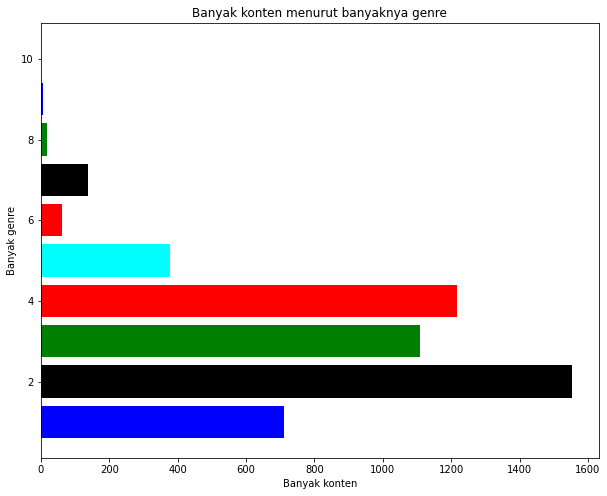

In [35]:
fig = plt.figure(figsize=(10,8))
ax = plt.barh(y=nflx2['genre_count'].unique(), width=nflx2['genre_count'].value_counts(), color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Banyak konten')
plt.ylabel('Banyak genre')
plt.title('Banyak konten menurut banyaknya genre')
plt.show(fig)

Production countries

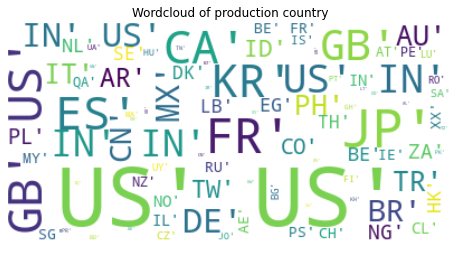

In [36]:
#Wordcloud of production country
prod_country = " ".join(i for i in nflx2.production_countries)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(prod_country)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Wordcloud of production country")
plt.axis("off")
plt.show()

In [37]:
prod_ctry_count= []
for i in nflx2['production_countries']:
   prod_ctry_count.append(len(i.split()))
nflx2['prod_ctry_count'] = prod_ctry_count

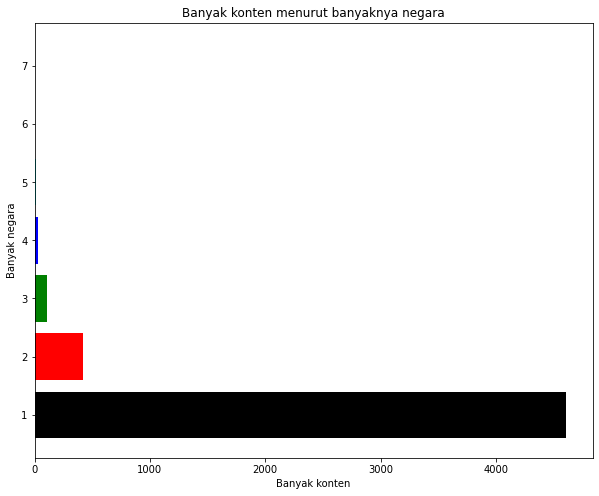

In [38]:
fig = plt.figure(figsize=(10,8))
ax = plt.barh(y=nflx2['prod_ctry_count'].unique(), width=nflx2['prod_ctry_count'].value_counts(), color=['black', 'red', 'green', 'blue', 'cyan'])
plt.xlabel('Banyak konten')
plt.ylabel('Banyak negara')
plt.title('Banyak konten menurut banyaknya negara')
plt.show(fig)

Seasons

For series only

In [39]:
nflx2[nflx2['type']=='SHOW']['seasons'].value_counts()

1.0     1034
2.0      362
3.0      179
4.0      116
5.0       75
6.0       35
7.0       18
8.0       10
9.0        9
11.0       7
10.0       6
12.0       3
15.0       3
24.0       2
13.0       2
20.0       1
32.0       1
19.0       1
29.0       1
14.0       1
37.0       1
21.0       1
25.0       1
42.0       1
39.0       1
16.0       1
Name: seasons, dtype: int64

<Figure size 720x576 with 0 Axes>

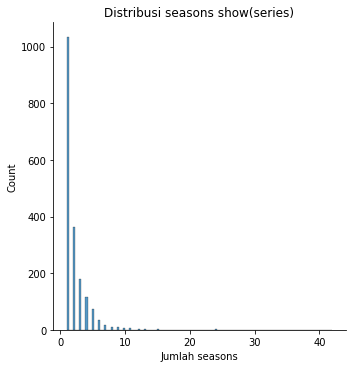

In [40]:
#sebaran seasons
fig1 = plt.figure(figsize=(10,8))
sns.displot(nflx2[nflx2['type']=='SHOW']['seasons'])
plt.title('Distribusi seasons show(series)')
plt.xlabel('Jumlah seasons')
plt.show(fig1)

Imdb score

In [41]:
#movie 
print("Rata-rata skor IMDb movie :",round(nflx2[nflx2['type']=='MOVIE']['imdb_score'].mean(),1))
#series
print("Rata-rata skor IMDb show :",round(nflx2[nflx2['type']=='SHOW']['imdb_score'].mean(),1))

Rata-rata skor IMDb movie : 6.2
Rata-rata skor IMDb show : 6.9


Tmdb score

In [42]:
#movie 
print("Rata-rata skor TMDB movie :",round(nflx2[nflx2['type']=='MOVIE']['tmdb_score'].mean(),1))
#series
print("Rata-rata skor TMDB show :",round(nflx2[nflx2['type']=='SHOW']['tmdb_score'].mean(),1))

Rata-rata skor TMDB movie : 6.5
Rata-rata skor TMDB show : 7.5


IMDb votes

<Figure size 720x576 with 0 Axes>

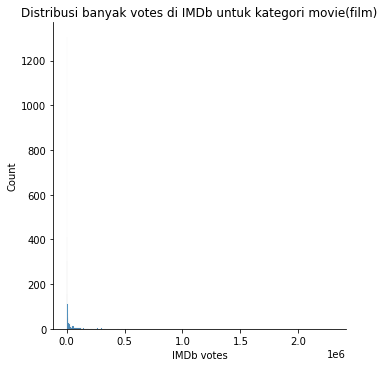

In [43]:
#movie
fig1 = plt.figure(figsize=(10,8))
sns.displot(x = nflx2[nflx2['type']=='MOVIE']['imdb_votes'])
plt.title('Distribusi banyak votes di IMDb untuk kategori movie(film)')
plt.xlabel('IMDb votes')
plt.show(fig1)

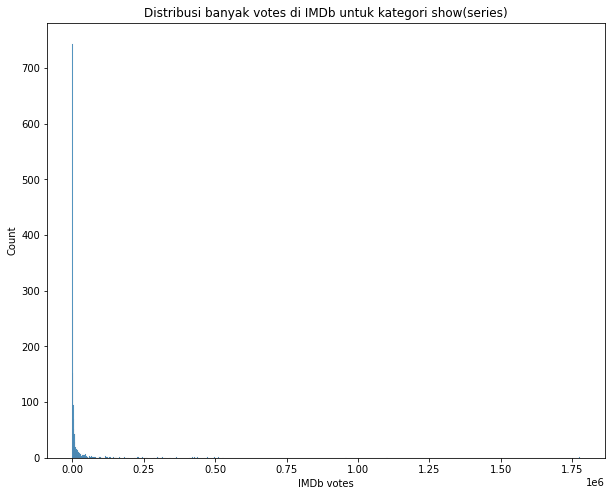

In [44]:
#show
fig1 = plt.figure(figsize=(10,8))
sns.histplot(x = nflx2[nflx2['type']=='SHOW']['imdb_votes'])
plt.title('Distribusi banyak votes di IMDb untuk kategori show(series)')
plt.xlabel('IMDb votes')
plt.show(fig1)

TMDB popularity

<Figure size 576x432 with 0 Axes>

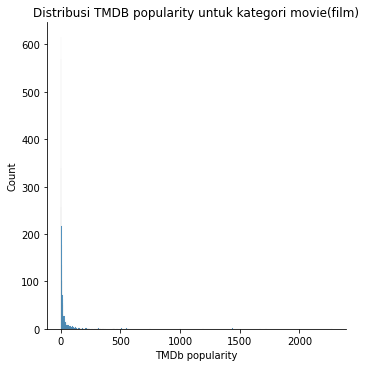

In [45]:
#movie  
fig1 = plt.figure(figsize=(8,6))
sns.displot(nflx2[nflx2['type']=='MOVIE']['tmdb_popularity'])
plt.title('Distribusi TMDB popularity untuk kategori movie(film)')
plt.xlabel('TMDb popularity')
plt.show(fig1)

<Figure size 576x432 with 0 Axes>

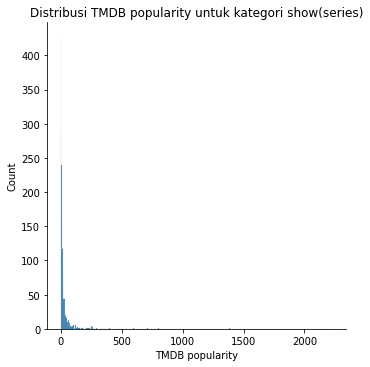

In [46]:
#show
fig2 = plt.figure(figsize=(8,6))
sns.displot(nflx2[nflx2['type']=='SHOW']['tmdb_popularity'])
plt.title('Distribusi TMDB popularity untuk kategori show(series)')
plt.xlabel('TMDB popularity')
plt.show(fig2)

In [47]:
print("min tmdb popularity :", nflx2['tmdb_popularity'].min())
print("max tmdb popularity :", nflx2['tmdb_popularity'].max())

min tmdb popularity : 0.6
max tmdb popularity : 2274.044


In [48]:
print("Min tmdb score :",nflx2['tmdb_score'].min())
print("Max tmdb score :", nflx2['tmdb_score'].max())

Min tmdb score : 1.0
Max tmdb score : 10.0


In [49]:
print("Min imdb score :",nflx2['imdb_score'].min())
print("Max tmdb score :", nflx2['imdb_score'].max())

Min imdb score : 0.0
Max tmdb score : 9.5


# Correlation between variables

Runtime and imdb rating

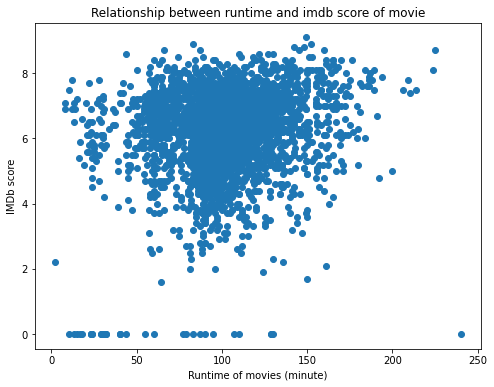

In [50]:
#movie
fig=plt.figure(figsize=(8,6))
plt.scatter(y=nflx2[nflx2['type']=='MOVIE']['imdb_score'], x=nflx2[nflx2['type']=='MOVIE']['runtime'])
plt.xlabel('Runtime of movies (minute)')
plt.ylabel('IMDb score')
plt.title('Relationship between runtime and imdb score of movie')
plt.show()

Looks like there is linear relationship between runtime and imdb score of movie

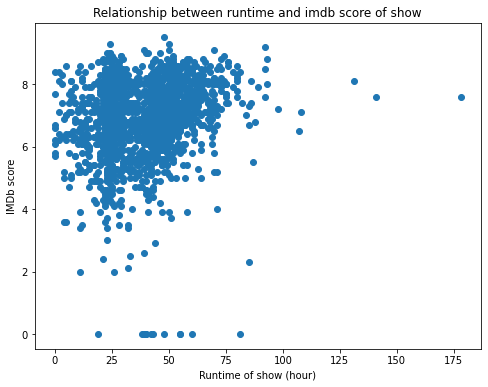

In [51]:
#series
fig=plt.figure(figsize=(8,6))
plt.scatter(y=nflx2[nflx2['type']=='SHOW']['imdb_score'], x=nflx2[nflx2['type']=='SHOW']['runtime'])
plt.xlabel('Runtime of show (hour)')
plt.ylabel('IMDb score')
plt.title('Relationship between runtime and imdb score of show')
plt.show()

Seems like there is week relationship between imdb score and runtime of show

Runtime and tmdb score

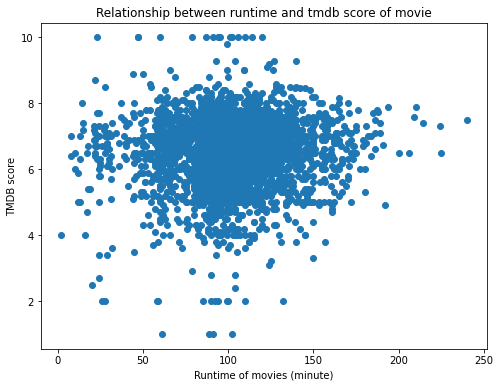

In [52]:
#movie
fig=plt.figure(figsize=(8,6))
plt.scatter(y=nflx2[nflx2['type']=='MOVIE']['tmdb_score'], x=nflx2[nflx2['type']=='MOVIE']['runtime'])
plt.xlabel('Runtime of movies (minute)')
plt.ylabel('TMDB score')
plt.title('Relationship between runtime and tmdb score of movie')
plt.show()

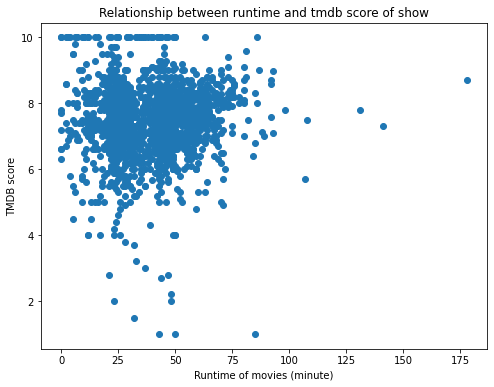

In [53]:
#show
fig=plt.figure(figsize=(8,6))
plt.scatter(y=nflx2[nflx2['type']=='SHOW']['tmdb_score'], x=nflx2[nflx2['type']=='SHOW']['runtime'])
plt.xlabel('Runtime of movies (minute)')
plt.ylabel('TMDB score')
plt.title('Relationship between runtime and tmdb score of show')
plt.show()

Looks like there is no linear relationship between tmdb score and runtime of show

Runtime and tmdb popularity

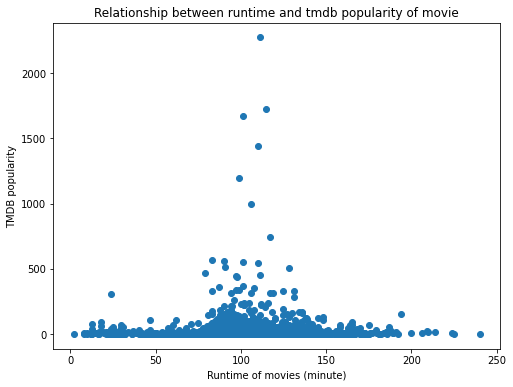

In [54]:
#movie
fig=plt.figure(figsize=(8,6))
plt.scatter(y=nflx2[nflx2['type']=='MOVIE']['tmdb_popularity'], x=nflx2[nflx2['type']=='MOVIE']['runtime'])
plt.xlabel('Runtime of movies (minute)')
plt.ylabel('TMDB popularity')
plt.title('Relationship between runtime and tmdb popularity of movie')
plt.show()

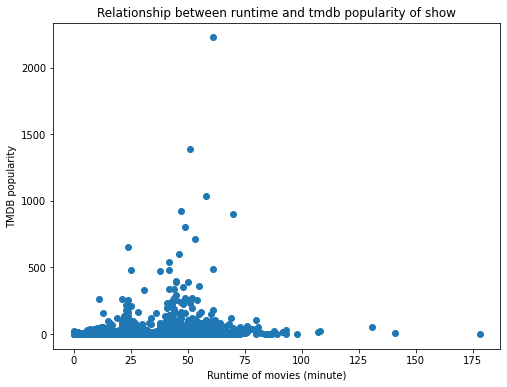

In [55]:
#movie
fig=plt.figure(figsize=(8,6))
plt.scatter(y=nflx2[nflx2['type']=='SHOW']['tmdb_popularity'], x=nflx2[nflx2['type']=='SHOW']['runtime'])
plt.xlabel('Runtime of movies (minute)')
plt.ylabel('TMDB popularity')
plt.title('Relationship between runtime and tmdb popularity of show')
plt.show()

In [56]:
#top 10 genres with highest average imdb score
nflx2.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(10)

genres
['scifi', 'animation', 'action', 'family', 'fantasy']                         9.3
['action', 'scifi', 'animation', 'horror', 'drama', 'fantasy']                9.0
['scifi', 'action', 'drama', 'animation', 'fantasy']                          9.0
['action', 'animation', 'comedy', 'fantasy']                                  9.0
['animation', 'thriller', 'scifi', 'drama', 'fantasy', 'crime']               9.0
['animation', 'action', 'scifi', 'western', 'comedy', 'drama', 'thriller']    8.9
['animation', 'action', 'comedy', 'drama', 'fantasy']                         8.8
['action', 'drama', 'thriller', 'romance', 'comedy', 'fantasy', 'horror']     8.8
['animation', 'action', 'drama', 'war', 'history']                            8.8
['action', 'scifi', 'music', 'thriller']                                      8.8
Name: imdb_score, dtype: float64

In [103]:
nflx2.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).reset_index(name='imdb_score')

,genres,imdb_score
0,"['scifi', 'animation', 'action', 'family', 'fa...",9.3
1,"['action', 'scifi', 'animation', 'horror', 'dr...",9.0
2,"['scifi', 'action', 'drama', 'animation', 'fan...",9.0
3,"['action', 'animation', 'comedy', 'fantasy']",9.0
4,"['animation', 'thriller', 'scifi', 'drama', 'f...",9.0
...,...,...
1676,"['drama', 'comedy', 'romance', 'fantasy']",2.0
1677,"['fantasy', 'comedy', 'animation']",0.0
1678,"['thriller', 'comedy', 'romance']",0.0
1679,"['thriller', 'horror', 'animation', 'drama', '...",0.0


In [59]:
#top 10 genres with highest average tmdb score
nflx2.groupby('genres')['tmdb_score'].mean().sort_values(ascending=False).head(10)

genres
['drama', 'scifi', 'comedy', 'history']                                        10.0
['fantasy', 'comedy', 'animation']                                             10.0
['thriller', 'horror', 'animation', 'comedy', 'drama', 'family', 'fantasy']    10.0
['family', 'fantasy', 'animation', 'comedy']                                   10.0
['family', 'music', 'animation']                                               10.0
['family', 'romance', 'comedy']                                                10.0
['animation', 'family', 'scifi']                                               10.0
['animation', 'comedy', 'family', 'scifi', 'action']                           10.0
['comedy', 'family', 'fantasy', 'scifi']                                       10.0
['crime', 'sport', 'documentation']                                            10.0
Name: tmdb_score, dtype: float64

In [60]:
#top 10 genres with highest average tmdb popularity
nflx2.groupby('genres')['tmdb_popularity'].mean().sort_values(ascending=False).head(10)

genres
['scifi', 'thriller', 'drama', 'fantasy', 'horror']             2226.2310
['comedy', 'family', 'fantasy', 'scifi', 'animation']           1723.3630
['comedy', 'horror', 'war', 'fantasy', 'thriller', 'action']    1668.2960
['action', 'thriller', 'drama', 'romance', 'comedy']            1439.9060
['scifi', 'thriller', 'drama', 'action', 'crime']                996.8690
['scifi', 'crime', 'drama', 'fantasy']                           922.1120
['drama', 'sport', 'comedy']                                     746.9280
['scifi', 'thriller', 'action', 'horror']                        698.9635
['action', 'animation', 'family', 'fantasy', 'comedy']           656.8320
['action', 'drama', 'scifi', 'horror', 'thriller']               597.2770
Name: tmdb_popularity, dtype: float64

In [61]:
#top 10 production_countries with highest imdb score
nflx2.groupby('production_countries')['imdb_score'].mean().sort_values(ascending=False).head(10)

production_countries
['UA', 'GB', 'US']                      8.3
['CD', 'GB']                            8.2
['CU', 'US']                            8.2
['ZA', 'GB']                            8.1
['US', 'DE', 'GB']                      8.1
['US', 'EG', 'GB']                      8.1
['AT', 'GB', 'US']                      8.0
['CA', 'HU', 'MX', 'ES', 'GB', 'US']    8.0
['TZ']                                  8.0
['US', 'CA', 'FR', 'ES']                8.0
Name: imdb_score, dtype: float64

In [62]:
#top 10 production_countries with highest tmdb score
nflx2.groupby('production_countries')['tmdb_score'].mean().sort_values(ascending=False).head(10)

production_countries
['ZA', 'US']                10.0000
['SG', 'US']                 9.3000
['ES', 'IT']                 9.2000
['TZ', 'GB']                 9.0000
['CA', 'BR']                 8.8000
['US', 'NG']                 8.7000
['US', 'IT']                 8.3265
['US', 'CA', 'FR', 'ES']     8.2000
['US', 'IN']                 8.1500
['NP', 'IN']                 8.1000
Name: tmdb_score, dtype: float64

In [63]:
#top 10 production_countries with highest tmdb popularity
nflx2.groupby('production_countries')['tmdb_popularity'].mean().sort_values(ascending=False).head(10)

production_countries
['US', 'CZ']          510.26800
['SE', 'GB']          358.25100
['ES', 'KN']          198.53500
['DE', 'FR']          177.03500
['GB', 'US', 'FR']    172.82900
['NZ', 'HK']          165.33900
['MX', 'ZA', 'US']    117.36900
['US', 'AU']          112.71225
['FR', 'DE', 'US']    106.52200
['US', 'CY']           96.70900
Name: tmdb_popularity, dtype: float64

In [64]:
#top 10 genre & production countries with highest imdb score
nflx2.groupby(['genres','production_countries'])['imdb_score'].mean().sort_values(ascending=False).head(10)

genres                                                                      production_countries
['scifi', 'animation', 'action', 'family', 'fantasy']                       ['US']                  9.30
['comedy', 'drama', 'family', 'romance']                                    ['KR']                  9.20
['action', 'scifi', 'animation', 'horror', 'drama', 'fantasy']              ['JP']                  9.00
['action', 'animation', 'comedy', 'fantasy']                                ['JP']                  9.00
['scifi', 'action', 'drama', 'animation', 'fantasy']                        ['US']                  9.00
['animation', 'thriller', 'scifi', 'drama', 'fantasy', 'crime']             ['JP']                  9.00
['drama', 'crime']                                                          ['AR']                  9.00
['drama', 'family']                                                         ['KR']                  8.95
['drama', 'crime', 'history']                                  

In [65]:
#top 10 genre & production countries with highest tmdb popularity
nflx2.groupby(['genres','production_countries'])['tmdb_popularity'].mean().sort_values(ascending=False).head(10)

genres                                                        production_countries
['horror']                                                    ['TW']                  2274.044
['scifi', 'thriller', 'drama', 'fantasy', 'horror']           ['US']                  2226.231
['comedy', 'family', 'fantasy', 'scifi', 'animation']         ['US']                  1723.363
['comedy', 'horror', 'war', 'fantasy', 'thriller', 'action']  ['ES']                  1668.296
['action', 'thriller', 'drama', 'romance', 'comedy']          ['US']                  1439.906
['scifi', 'thriller', 'action', 'horror']                     ['US']                  1387.392
['drama', 'crime', 'thriller']                                ['ZA']                  1194.149
['scifi', 'thriller', 'drama', 'action', 'crime']             ['US']                   996.869
['scifi', 'crime', 'drama', 'fantasy']                        ['US']                   922.112
['action', 'drama', 'thriller', 'crime']                      

In [66]:
#top 10 movie, genre & production countries with highest imdb score
nflx2[nflx2['type']=='MOVIE'].groupby(['genres','production_countries'])['imdb_score'].mean().sort_values(ascending=False).head(10)

genres                                                    production_countries
['action', 'scifi', 'music', 'thriller']                  ['US', 'GB']            8.8
['animation', 'action', 'fantasy']                        ['IN']                  8.7
['comedy', 'drama', 'music', 'reality']                   ['US']                  8.7
['drama', 'romance', 'family', 'documentation', 'sport']  ['PH']                  8.6
['music', 'documentation']                                ['BR']                  8.5
['crime', 'drama', 'action', 'thriller', 'european']      ['US', 'FR']            8.5
['documentation']                                         ['TR']                  8.4
['western', 'drama']                                      ['US']                  8.4
['comedy', 'thriller', 'drama', 'action', 'crime']        ['IN']                  8.4
['comedy', 'drama', 'history']                            ['IN']                  8.4
Name: imdb_score, dtype: float64

In [67]:
#top 10 movie, genre & production countries with highest tmdb popularity
nflx2[nflx2['type']=='MOVIE'].groupby(['genres','production_countries'])['tmdb_popularity'].mean().sort_values(ascending=False).head(10)

genres                                                                                production_countries
['horror']                                                                            ['TW']                  2274.044
['comedy', 'family', 'fantasy', 'scifi', 'animation']                                 ['US']                  1723.363
['comedy', 'horror', 'war', 'fantasy', 'thriller', 'action']                          ['ES']                  1668.296
['action', 'thriller', 'drama', 'romance', 'comedy']                                  ['US']                  1439.906
['drama', 'crime', 'thriller']                                                        ['ZA']                  1194.149
['scifi', 'thriller', 'drama', 'action', 'crime']                                     ['US']                   996.869
['drama', 'sport', 'comedy']                                                          ['US']                   746.928
['scifi', 'fantasy', 'romance', 'sport', 'thriller', 'animat

In [68]:
#top 10 show, genre & production countries with highest imdb score
nflx2[nflx2['type']=='SHOW'].groupby(['genres','production_countries'])['imdb_score'].mean().sort_values(ascending=False).head(10)

genres                                                           production_countries
['scifi', 'animation', 'action', 'family', 'fantasy']            ['US']                  9.30
['comedy', 'drama', 'family', 'romance']                         ['KR']                  9.20
['drama', 'comedy']                                              ['IN']                  9.10
['documentation', 'history', 'sport']                            ['US']                  9.10
['scifi', 'action', 'drama', 'animation', 'fantasy']             ['US']                  9.00
['action', 'scifi', 'animation', 'horror', 'drama', 'fantasy']   ['JP']                  9.00
['animation', 'thriller', 'scifi', 'drama', 'fantasy', 'crime']  ['JP']                  9.00
['action', 'animation', 'comedy', 'fantasy']                     ['JP']                  9.00
['drama', 'crime']                                               ['AR']                  9.00
['drama', 'family']                                              ['K

In [154]:
#top 10 movie, genre & production countries with highest tmdb popularity
nflx2[nflx2['type']=='SHOW'].groupby(['genres','production_countries'])['tmdb_popularity'].mean().sort_values(ascending=False).reset_index(name='tmdb_popularity').head(10)

,genres,production_countries,tmdb_popularity,genre & production_country
0,"['scifi', 'thriller', 'drama', 'fantasy', 'hor...",['US'],2226.231,"['scifi', 'thriller', 'drama', 'fantasy', 'hor..."
1,"['scifi', 'thriller', 'action', 'horror']",['US'],1387.392,"['scifi', 'thriller', 'action', 'horror']&['US']"
2,"['scifi', 'crime', 'drama', 'fantasy']",['US'],922.112,"['scifi', 'crime', 'drama', 'fantasy']&['US']"
3,"['action', 'drama', 'thriller', 'crime']",['KR'],904.326,"['action', 'drama', 'thriller', 'crime']&['KR']"
4,"['documentation', 'crime', 'drama']",['ES'],712.899,"['documentation', 'crime', 'drama']&['ES']"


In [70]:
#top 10 release year movie with highest imdb score
nflx2[nflx2['type']=='MOVIE'].groupby('release_year')['imdb_score'].mean().sort_values(ascending=False).head(10)

release_year
1969    8.10
1985    8.00
1967    7.70
1971    7.70
1963    7.60
1958    7.50
1961    7.50
1977    7.50
1954    7.45
1987    7.35
Name: imdb_score, dtype: float64

In [71]:
#top 10 release year show with highest imdb score
nflx2[nflx2['type']=='SHOW'].groupby('release_year')['imdb_score'].mean().sort_values(ascending=False).head(10)

release_year
1969    8.800000
2002    8.260000
1972    8.100000
1995    8.050000
2006    7.966667
2000    7.940000
1997    7.900000
1998    7.880000
1999    7.666667
2008    7.616667
Name: imdb_score, dtype: float64

In [72]:
#top 10 release year movie with highest tmdb popularity
nflx2[nflx2['type']=='MOVIE'].groupby('release_year')['tmdb_popularity'].mean().sort_values(ascending=False).head(10)

release_year
2022    133.510174
2021     34.734775
1997     27.783143
1984     27.220000
2003     24.101895
2007     23.857629
1994     20.166083
2002     20.070462
2010     19.587690
1992     19.580000
Name: tmdb_popularity, dtype: float64

In [73]:
#top 10 release year show with highest tmdb popularity
nflx2[nflx2['type']=='SHOW'].groupby('release_year')['tmdb_popularity'].mean().sort_values(ascending=False).head(10)

release_year
2005    169.238250
1997    102.103500
2008     66.255417
2010     64.756357
2013     63.258303
1999     63.130333
1995     56.478500
2002     56.301200
2022     55.640756
2009     53.844000
Name: tmdb_popularity, dtype: float64

In [172]:
abcv = nflx2[nflx2['type'] =='SHOW']['seasons']/nflx2[nflx2['type'] =='SHOW']['runtime']
abcv.replace([np.inf, -np.inf], np.nan, inplace=True)
abcv.dropna(inplace=True)
abcv.describe()

count    1863.000000
mean        0.084947
std         0.154943
min         0.005618
25%         0.022222
50%         0.040000
75%         0.086957
max         2.500000
dtype: float64